<a href="https://colab.research.google.com/github/Saroramath/MachineLearning/blob/main/6205A1Q1Start_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
The analysis for Question 1 for the Assignment is done in the following notebook. It can be found [here](https://https://github.com/Saroramath/MachineLearning/blob/main/6205A1Q1Start_up.ipynb). The notebook is divided into different sections with comments along the way. The conclusion is presennted in the end.

## Importing libraries

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io
import numpy as np


## Importing the data

In [52]:
uploaded = files.upload()    #upload the file "StartUpProfits.csv". You can find the file in Data example folder. 

Saving StartUpProfits.csv to StartUpProfits (1).csv


In [53]:
df = pd.read_csv(io.StringIO(uploaded['StartUpProfits.csv'].decode('utf-8')))



---



## Knowing the data

In [54]:
df.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


* **The data has 50 samples with no null values. It does not necessarily means that data is complete. Sometimes non-availabilty of data could have been marked as zero.**




* **We next find the number of values marked zero in the data.**

In [56]:
print(np.count_nonzero(df==0)) # number of zero values in the data.

5


In [57]:
df.State.unique() # number of unique states in the categorical data of State.

array(['New York', 'California', 'Florida'], dtype=object)



---



## Visualizing the data

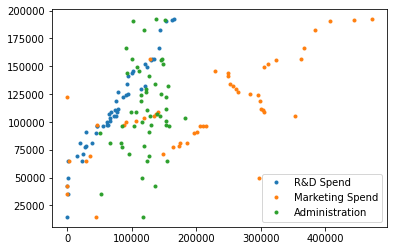

In [58]:
plt.plot(df['R&D Spend'], df.Profit,'.',label = "R&D Spend")
plt.plot(df['Marketing Spend'], df.Profit,'.', label
         = "Marketing Spend")
plt.plot(df.Administration, df.Profit,'.',label="Administration")
plt.legend()

* **Both R&D spending and Marketing spending shows positive corelation with 
Profits, with R&D spending having higher coefficient. The administartive cost seems to have no direct corelation with Profits.**
* **We can further see that with a corelation heat map.**

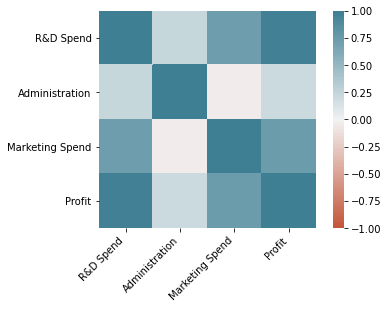

In [59]:
corr = df.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);



---



## Preparing the data 

We first rename the colums for easier analysis.

In [60]:
df = df.rename(columns = {'R&D Spend':'RD'})
df = df.rename(columns = {'Marketing Spend':'Marketing'}) #Rename the columns for easier analysis later.

*  There are **five** places with missing data. We will **drop** those data values from our analysis. We tried for the sake of learning, a k-nearest neighbourhood regression to fill the missing data. Those are not so significant for the present problem so we have skipped the details here.

In [61]:
columns = df.columns.tolist()
columns.remove('State')
columns

['RD', 'Administration', 'Marketing', 'Profit']

In [62]:
for col in columns:
          df = df.loc[lambda df: df[col] > 0, :]   #Drop the zero values.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 46
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RD              46 non-null     float64
 1   Administration  46 non-null     float64
 2   Marketing       46 non-null     float64
 3   State           46 non-null     object 
 4   Profit          46 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.2+ KB


So now we have **46** data instances of comlete data to do an analysis.



---



**Since there are only three different States. We will encode the State data into numerical data as vectors**



In [64]:
df_encode = pd.get_dummies(df['State'], prefix='State') #encode the States into vectors

In [65]:
df_encode.head(3)

,State_California,State_Florida,State_New York
0,0,0,1
1,1,0,0
2,0,1,0


Now we will join the encoded data to our orginal dataframe.

In [66]:
df = pd.concat([df,df_encode], axis=1) #Join the encoded data and drop the State
df = df.drop(columns='State')

In [67]:
df.head(3)

,RD,Administration,Marketing,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 46
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RD                46 non-null     float64
 1   Administration    46 non-null     float64
 2   Marketing         46 non-null     float64
 3   Profit            46 non-null     float64
 4   State_California  46 non-null     uint8  
 5   State_Florida     46 non-null     uint8  
 6   State_New York    46 non-null     uint8  
dtypes: float64(4), uint8(3)
memory usage: 1.9 KB


## Modelling and predicting the data

**As we can see from the plots, the Profit data is showing some linearitly with respect to two of the features, making linear regression a good fit for this dataset.**




In [69]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

We split the data to use 80% for training our model and 20% to use for testing it.

In [70]:
 df_train, df_test= train_test_split( df, test_size = 0.2, random_state = 1) #Split the data to use 80% for training the model and 20% to test it.

**We select the features to train the model on.**

In [71]:
features = (df.columns.tolist())
features.remove('Profit')

In [72]:
features

['RD',
 'Administration',
 'Marketing',
 'State_California',
 'State_Florida',
 'State_New York']

In [73]:
linear_regression = linear_model.LinearRegression()

In [74]:
linear_regression.fit(df_train[features], df_train['Profit'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We predict the values on the test data with our model.

In [75]:
df_predictedProfit = linear_regression.predict(df_test[features])

We can check how good our model is with the Mean Square error and the r^2 score.

In [76]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(df_test['Profit'], df_predictedProfit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(df_test['Profit'], df_predictedProfit))

Mean squared error: 53513586.87
Coefficient of determination: 0.96


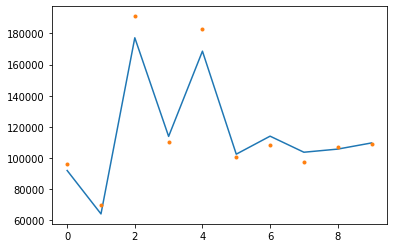

In [80]:
df_test.reset_index(drop=True, inplace=True)
plt.plot(df_predictedProfit)
plt.plot(df_test['Profit'],'.')

**We can see that the predicted values are closely following the data, and a good coefficient of detemination shows that it is a good model to predict the profits in a start-up** 


---

Note that it is a multi-linear regression, so although the model being a linear vector in 5-dimensions, it is not being visualized here as a linear line. We can see note the co-effiecint of the vector below.



In [81]:
print('Intercept: {}'.format(linear_regression.intercept_))
print('Coefficients: {}'.format(linear_regression.coef_))

Intercept: 58280.66175485056
Coefficients: [ 7.63872631e-01 -4.22882271e-02  1.62561000e-02  1.76224544e+03
 -6.19328382e+02 -1.14291706e+03]


## Experimenting with different features.

We will do a quick try with different combinations of features.

In [ ]:
features = ['RD','Administration','Marketing']
linear_regression.fit(df_train[features], df_train['Profit'])
df_predictedProfit = linear_regression.predict(df_test[features])
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(df_test['Profit'], df_predictedProfit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(df_test['Profit'], df_predictedProfit))

Mean squared error: 48506534.04
Coefficient of determination: 0.96


In [ ]:
features = ['RD','Marketing']
linear_regression.fit(df_train[features], df_train['Profit'])
df_predictedProfit = linear_regression.predict(df_test[features])
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(df_test['Profit'], df_predictedProfit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(df_test['Profit'], df_predictedProfit))

Mean squared error: 53129220.72
Coefficient of determination: 0.96


In [48]:
features = ['RD','Marketing','State_California','State_Florida','State_New York']
linear_regression.fit(df_train[features], df_train['Profit'])
df_predictedProfit = linear_regression.predict(df_test[features])
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(df_test['Profit'], df_predictedProfit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(df_test['Profit'], df_predictedProfit))

Mean squared error: 59160936.28
Coefficient of determination: 0.96


Mean squared error: 63967684.79
Coefficient of determination: 0.95


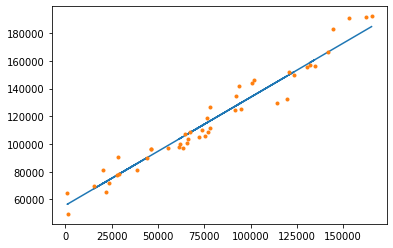

In [50]:
features = ['RD']
linear_regression.fit(df_train[features], df_train['Profit'])
df_predictedProfit = linear_regression.predict(df_test[features])
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(df_test['Profit'], df_predictedProfit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(df_test['Profit'], df_predictedProfit))
#df_predictedProfit.reset_index(drop=True)
df_prediction = linear_regression.predict(df[features])
plt.plot(df['RD'],df_prediction)
plt.plot(df['RD'],df['Profit'],'.')



Mean squared error: 456404325.07
Coefficient of determination: 0.66


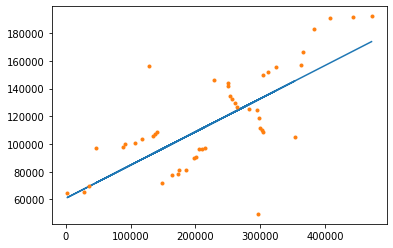

In [ ]:
features = ['Marketing']
linear_regression.fit(df_train[features], df_train['Profit'])
df_predictedProfit = linear_regression.predict(df_test[features])
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(df_test['Profit'], df_predictedProfit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(df_test['Profit'], df_predictedProfit))
#df_predictedProfit.reset_index(drop=True)
df_prediction = linear_regression.predict(df[features])
plt.plot(df['Marketing'],df_prediction)
plt.plot(df['Marketing'],df['Profit'],'.')


**As we can see from the above examples, there is no major imporvement with adopting a model with a subset of the features for our data. So we will keep the model with all features as our final model.**

## Conclusion


* The sample space had 50 data instances with 4 corrupted instances due to some missing values.
* The k-nearest neighbour regression was tried to fill the data but for keeping it brief here, it is not included in the analysis. 
* The analysis is done with 46 data points by removing the missing data instances.
* The data plot shows linearity of data with respect to individual features, hence making linear regression a good-fit for analysis.
* A linear regression model is trained for 80% of the data.
* The Mean square error and R2 score are obtained on test data as 53513586.87 and 0.96 respectively. 
* Different models are tried with different combinations of features but no significant improvement, therefore the model with all features is kept as the final model.